#Data loading and Preparation

In [171]:
#Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [172]:
#Loading data
path = '/content/4A_cleaned_7.xlsx'
data =pd.read_excel(path)
data.head(2)

,IP NUMBER,UNIT,SEX,AGE,MARITAL STATUS,RELIGION,DISTRICT OF RESIDENCE,REGION,WORKING DIAGNOSIS,ADDITIONAL WORKING DIAGNOSIS,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,TB_type,NUMBER OF PREVIOUS ADMISSIONS,DAY OF ADMISSION,MONTH OF ADMISSION,YEAR OF ADMISSION,DURATION,OUT COME
0,1861416,GI,M,30,2,COU,Nakasongola,CENTRAL,"ISS,Abdominal TB,,","ISS,,",1,Abdominal_TB,5,Tuesday,November,2010,5,IMPROVED
1,1868011,GI,F,46,2,COU,Kampala,CENTRAL,"ISS Stage I&II,Disseminated TB,,","ISS Stage I&II,,",1,Disseminated TB,3,Monday,December,2010,3,IMPROVED


In [173]:
data['TB_type'].unique()

array(['Abdominal_TB', 'Disseminated TB', 'PTB', 'Other TBs', 'CNS_TB',
       'TB iris'], dtype=object)

##**Preparing data**

In [174]:
data.dropna(subset=['NUMBER OF PREVIOUS ADMISSIONS'], inplace=True)
data.dropna(subset=['IP NUMBER'], inplace=True)

data = data[data['IP NUMBER']  != 'a' ]
data = data[data['IP NUMBER']  != 'vf' ]

In [175]:
data.shape

(4034, 18)

In [176]:
#data.to_excel('final_cleaned_TB-4a.xlsx', index=False)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4034 entries, 0 to 4033
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   IP NUMBER                               4034 non-null   object
 1   UNIT                                    4034 non-null   object
 2   SEX                                     4034 non-null   object
 3   AGE                                     4034 non-null   int64 
 4   MARITAL STATUS                          4031 non-null   object
 5   RELIGION                                4034 non-null   object
 6   DISTRICT OF RESIDENCE                   4034 non-null   object
 7   REGION                                  4034 non-null   object
 8   WORKING DIAGNOSIS                       4034 non-null   object
 9   ADDITIONAL WORKING DIAGNOSIS            3854 non-null   object
 10  NUMBER OF ADDITIONAL WORKING DIAGNOSIS  4034 non-null   int64 
 11  TB_t

In [178]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [179]:
#Deleting features which are not going to be used
features_to_remove = ['IP NUMBER', 'UNIT','YEAR OF ADMISSION','DISTRICT OF RESIDENCE','WORKING DIAGNOSIS' ,'ADDITIONAL WORKING DIAGNOSIS',
                'MARITAL STATUS']
data = data.drop(columns = features_to_remove)

In [180]:

non_features = ['OUT COME']
data1 = data.drop(columns=non_features)

#**Data Preprocessing**

In [181]:
#filtering out only patients with "DIED" outcome
data = data[data['OUT COME'] == 'DIED']

In [182]:
#data['YEAR OF ADMISSION'] = data['YEAR OF ADMISSION'].astype(str)

In [183]:
#Encoding categorical features
non_features = ['DURATION', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','AGE','NUMBER OF PREVIOUS ADMISSIONS']
data1 = data.drop(columns=non_features)

text_columns = data1.select_dtypes(include=['object']).columns

data2 = pd.get_dummies(data, columns=text_columns)

In [184]:
data2['NUMBER OF PREVIOUS ADMISSIONS'].unique()

array([ 2,  4,  5,  1,  7,  6,  9, 20, 11, 13,  3,  8, 15, 14, 10, 18, 16,
       22, 21, 25, 12, 26, 23, 92,  0])

In [185]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'] = data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].astype(float)
data2['AGE'] = data2['AGE'].astype(float)

In [186]:
data2.sample(4)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September,OUT COME_DIED
3261,45.0,1.0,0,4,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3347,22.0,1.0,0,7,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
781,54.0,2.0,2,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
658,40.0,3.0,3,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [187]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1291 entries, 5 to 4030
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   AGE                                     1291 non-null   float64
 1   NUMBER OF ADDITIONAL WORKING DIAGNOSIS  1291 non-null   float64
 2   NUMBER OF PREVIOUS ADMISSIONS           1291 non-null   int64  
 3   DURATION                                1291 non-null   int64  
 4   SEX_F                                   1291 non-null   uint8  
 5   SEX_M                                   1291 non-null   uint8  
 6   RELIGION_CATHOLIC                       1291 non-null   uint8  
 7   RELIGION_COU                            1291 non-null   uint8  
 8   RELIGION_ISLAM                          1291 non-null   uint8  
 9   RELIGION_OTHERS                         1291 non-null   uint8  
 10  RELIGION_PENTECOSTAL                    1291 non-null   uint

AGE
0.9509241869210756


<ipython-input-188-2ebe16f7c6fb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


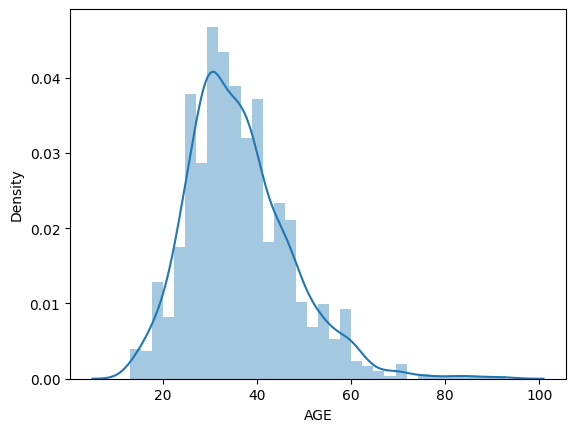

NUMBER OF PREVIOUS ADMISSIONS
9.760011787542462


<ipython-input-188-2ebe16f7c6fb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


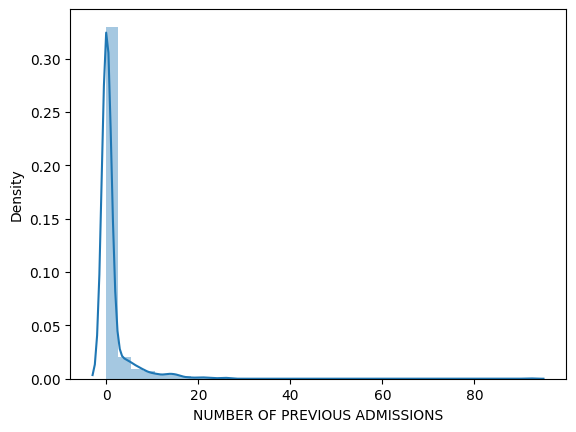

NUMBER OF ADDITIONAL WORKING DIAGNOSIS
0.47741907750448015


<ipython-input-188-2ebe16f7c6fb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


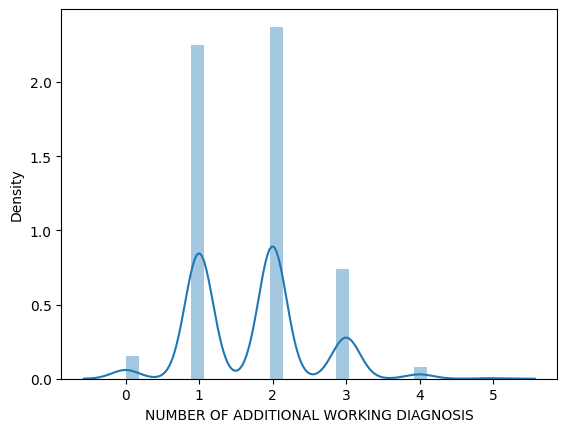

DURATION
1.4581473673442764


<ipython-input-188-2ebe16f7c6fb>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2[col])


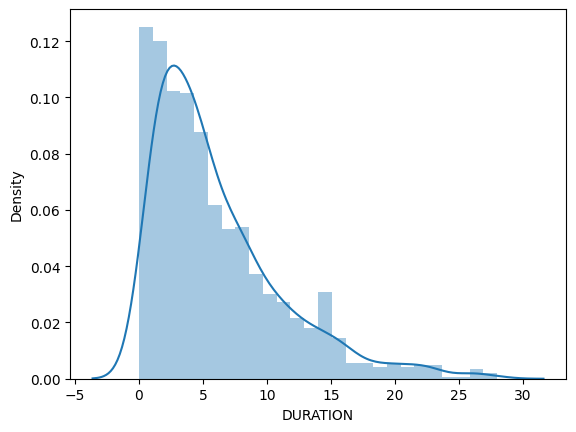

In [188]:
from scipy.stats import skew
import seaborn as sns

#Visualizing skeness of the continuous features
continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in continuous_features:
  print(col)
  print(skew(data2[col]))

  plt.figure()
  sns.distplot(data2[col])
  plt.show()

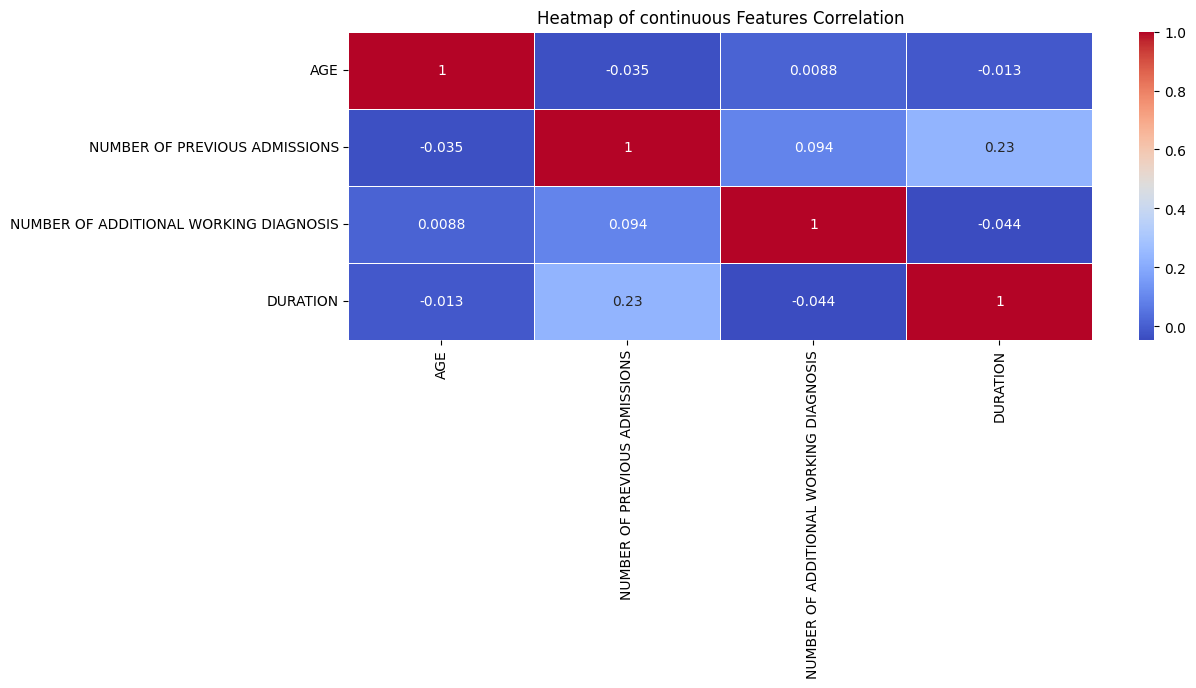

In [189]:
#Visualizing Correlation among the continuous features nluding the target
continuous_features_target = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS', 'DURATION']
plt.figure(figsize=(12,4))
sns.heatmap(data2[continuous_features_target].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of continuous Features Correlation')
plt.show()

In [190]:
#Transforming the continuous features
transform_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS', 'NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']
for col in transform_features:
  data2[col] = np.log1p(data2[col])

#Second transformation
data2['NUMBER OF PREVIOUS ADMISSIONS'] = np.log1p(data2['NUMBER OF PREVIOUS ADMISSIONS'])
data2['DURATION'] = np.log1p(data2['DURATION'])
data2['DURATION'] = np.log1p(data2['DURATION'])

In [191]:
#Normalizing and Standardizing continuous features
normalise_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS']
scaler = MinMaxScaler()
data2[normalise_features] = scaler.fit_transform(data2[normalise_features])


<function matplotlib.pyplot.show(close=None, block=None)>

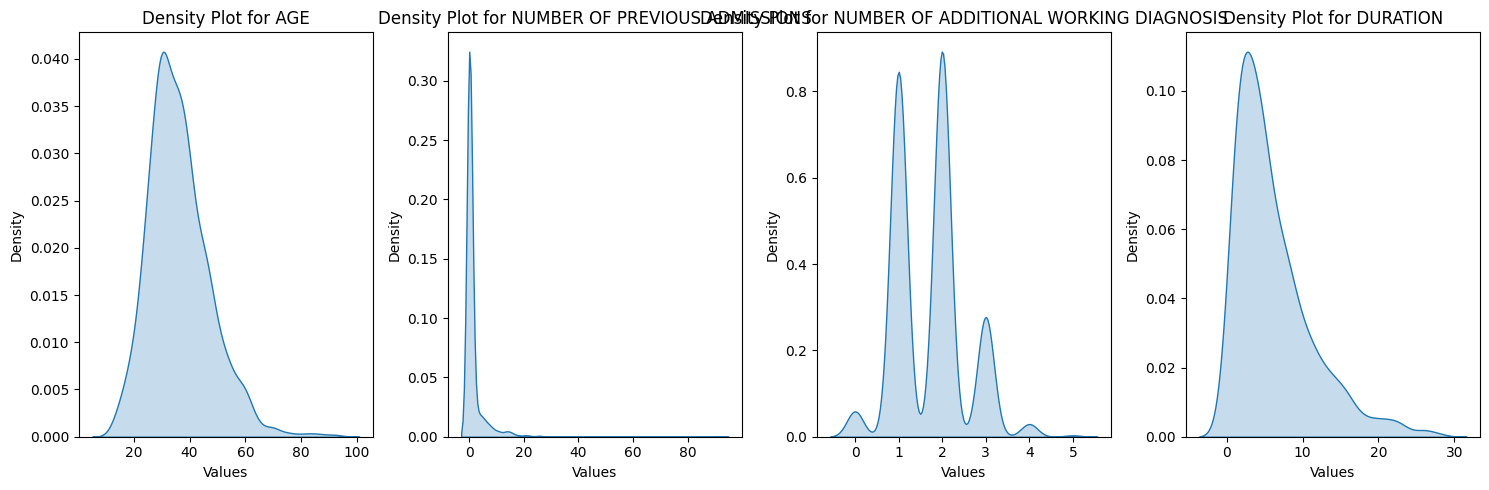

In [192]:
#Plotting Density plot
import seaborn as sns

continuous_features = ['AGE','NUMBER OF PREVIOUS ADMISSIONS','NUMBER OF ADDITIONAL WORKING DIAGNOSIS','DURATION']

fig, axes = plt.subplots(1, len(continuous_features), figsize=(15, 5))

for i, col in enumerate(continuous_features):
  sns.kdeplot(data[col], fill=True,ax=axes[i])
  axes[i].set_title(f'Density Plot for {col}')
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Density')
# plt.figure(figsize=(8,9))
# plt.bar(data['AGE'])
plt.tight_layout()
plt.show

In [193]:
data2.head(2)

,AGE,NUMBER OF ADDITIONAL WORKING DIAGNOSIS,NUMBER OF PREVIOUS ADMISSIONS,DURATION,SEX_F,SEX_M,RELIGION_CATHOLIC,RELIGION_COU,RELIGION_ISLAM,RELIGION_OTHERS,...,MONTH OF ADMISSION_February,MONTH OF ADMISSION_January,MONTH OF ADMISSION_July,MONTH OF ADMISSION_June,MONTH OF ADMISSION_March,MONTH OF ADMISSION_May,MONTH OF ADMISSION_November,MONTH OF ADMISSION_October,MONTH OF ADMISSION_September,OUT COME_DIED
5,0.304489,0.386853,0.433328,0.554618,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
6,0.160370,0.613147,0.560682,0.672503,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [194]:
data2['NUMBER OF ADDITIONAL WORKING DIAGNOSIS'].unique()

array([0.38685281, 0.61314719, 0.77370561, 1.        , 0.8982444 ,
       0.        ])

In [195]:
data2.shape

(1291, 42)

In [196]:
#Saving Preprocced data
#data.to_excel('preprocessed1_TB-4a.xlsx', index=False)

In [197]:
#extracting features and targets

X = data2.drop(columns=continuous_features).values
y = data2['DURATION'].values

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


#**MODEL TRAINING (Tensorflow)**

##**Libraries and architecture**

In [198]:
import tensorflow as tf
from tensorflow import keras

import torch
import torch.optim as optim

tf.random.set_seed(42)


In [199]:
n_neurons = X_train.shape[1] / 2
#neural network Architecture(ANN)
model1 = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(19, activation='sigmoid',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='sigmoid',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='sigmoid',kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])

#custome loss function
def custom_mse(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))


model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae','mse'] )
model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 19)                741       
                                                                 
 batch_normalization_9 (Bat  (None, 19)                76        
 chNormalization)                                                
                                                                 
 dropout_9 (Dropout)         (None, 19)                0         
                                                                 
 dense_13 (Dense)            (None, 6)                 120       
                                                                 
 batch_normalization_10 (Ba  (None, 6)                 24        
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 6)                

##Training, Evaluation and visualiztion

In [200]:
#model1 training and validation
history1 = model1.fit(X_train, y_train, epochs=80, batch_size=32, validation_split=0.2)

Epoch 1/80
26/26 [==============================] - 2s 14ms/step - loss: 3.3654 - mae: 1.4219 - mse: 3.3654 - val_loss: 2.1560 - val_mae: 1.4580 - val_mse: 2.1560
Epoch 2/80
26/26 [==============================] - 0s 5ms/step - loss: 2.5959 - mae: 1.2516 - mse: 2.5959 - val_loss: 1.5869 - val_mae: 1.2477 - val_mse: 1.5869
Epoch 3/80
26/26 [==============================] - 0s 5ms/step - loss: 2.3186 - mae: 1.1740 - mse: 2.3186 - val_loss: 1.1851 - val_mae: 1.0747 - val_mse: 1.1851
Epoch 4/80
26/26 [==============================] - 0s 5ms/step - loss: 2.1052 - mae: 1.1197 - mse: 2.1052 - val_loss: 0.8768 - val_mae: 0.9201 - val_mse: 0.8768
Epoch 5/80
26/26 [==============================] - 0s 5ms/step - loss: 1.6156 - mae: 0.9892 - mse: 1.6156 - val_loss: 0.6578 - val_mae: 0.7920 - val_mse: 0.6578
Epoch 6/80
26/26 [==============================] - 0s 5ms/step - loss: 1.6511 - mae: 1.0224 - mse: 1.6511 - val_loss: 0.4982 - val_mae: 0.6837 - val_mse: 0.4982
Epoch 7/80
26/26 [=========

In [201]:
predictions = model1.predict(X_test)
mse = custom_mse(y_test, predictions)
print("Test Mean Squared Error:", mse)

9/9 [==============================] - 0s 2ms/step
Test Mean Squared Error: tf.Tensor(0.03243329492761493, shape=(), dtype=float64)


In [202]:
#Evaluating the model's performance
test_loss, test_mae, test_mse = model1.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')

9/9 [==============================] - 0s 2ms/step - loss: 0.0325 - mae: 0.1281 - mse: 0.0325
Test Loss: 0.032529670745134354
Test MAE: 0.12807728350162506
Test MSE: 0.032529670745134354


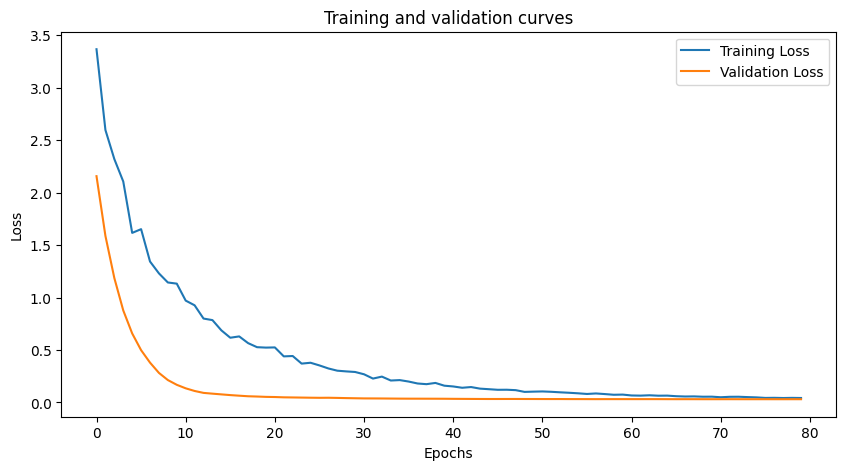

In [203]:
#extracting relevant informationfrom the training history
train_loss =history1.history['loss']
val_loss = history1.history['val_loss']

#Plotting Traing and validation cures
plt.figure(figsize=(10,5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation curves')
plt.show()

In [204]:
#making predictions
y_pred1 = model1.predict(X_test)

#Changing the shape of the results and getting the loss
y_pred1_= y_pred1.flatten()
residual1 = y_test - y_pred1_

9/9 [==============================] - 0s 2ms/step


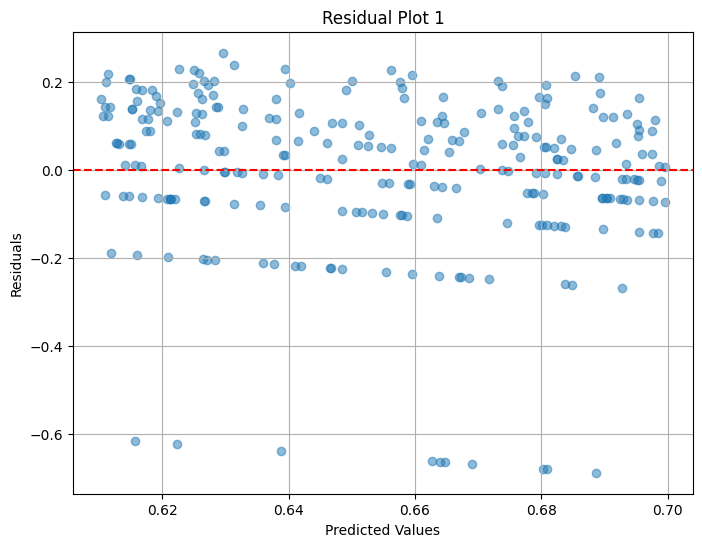

In [205]:
#Plotting the Residual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred1_, residual1,alpha=0.5)
plt.title('Residual Plot 1')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()

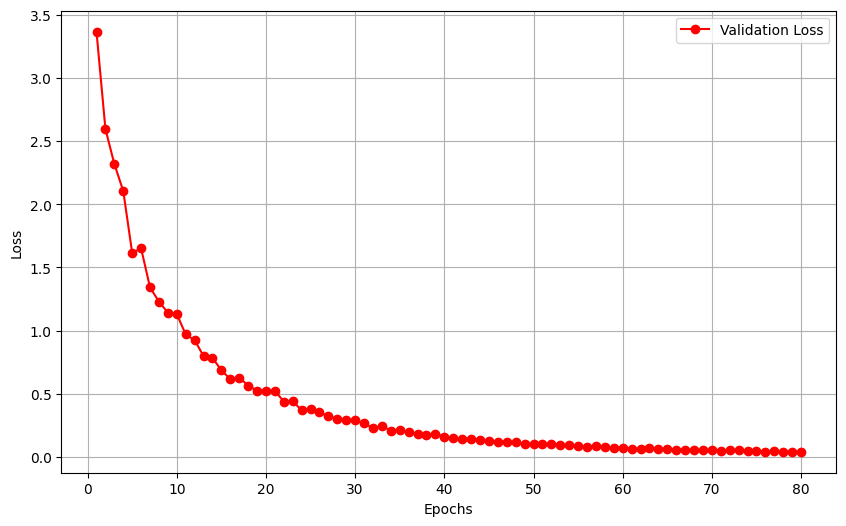

In [206]:
#plotting a learning curve
hist_dict = history1.history
loss_values = hist_dict['loss']
val_loss_values = hist_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs,loss_values,'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

#**Model Training (PyTorch)**

##Library and data

In [207]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [208]:
# Converting data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

##Architecture

In [209]:
# Define your regression model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(38, 10)
        self.fc2 = nn.Linear(10, 6)
        self.fc3 = nn.Linear(6, 3)
        self.fc4 = nn.Linear(3, 1)
        self.theta = nn.Parameter(torch.tensor(0.5, dtype=torch.float32))  # Learnable theta

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model with Xavier (Glorot) initialization
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)


##Loss function

In [219]:
# Define your custom loss function
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, theta, y_true, y_pred):
        loss = torch.abs(y_true - y_pred)
        custom_loss = theta * loss
        return torch.mean(custom_loss)

# Defining the custom mean absolute error loss function
def custom_mean_absolute_error(y_true, y_pred):
    diff = torch.abs(y_true - y_pred)
    return torch.mean(diff)

# Defining the custom mean squared error loss function
def custom_mean_squared_error(y_true, y_pred):
    diff = y_true - y_pred
    return torch.mean(torch.square(diff))


##**Model**

In [220]:

model = MyModel()
model.apply(init_weights)

# Create the custom loss function
custom_loss = CustomLoss()

# First, compiling the model with the Adam optimizer
adam_optimizer = optim.Adam(model.parameters(), lr=0.001)
# adam_loss_fn = custom_mean_squared_error
# custom_loss_fn = CustomLoss(theta)

# Lists to store the training and validation losses
train_losses = []
val_losses = []

# Training loop with Adam optimization
for epoch in range(10):
    adam_optimizer.zero_grad()
    y_pred = model(X_train)
    adam_loss = custom_loss(model.theta,y_train, y_pred)
    adam_loss.backward()
    adam_optimizer.step()

# Making predictions using the Adam-trained model
y_pred_adam = model(X_test)

# # Calculating the test loss with MSE
# mse_adam = custom_mean_squared_error(y_test, y_pred_adam)
# print(f"Test MSE with Adam: {mse_adam:.4f}")

# # Calculating the test loss with Mean Absolute Error (MAE)
# mae_adam = custom_mean_absolute_error(y_test, y_pred_adam)
# print(f"Test MAE with Adam: {mae_adam:.4f}")


# Calculating the test loss with MSE
mse_adam = custom_loss(model.theta, y_test, y_pred_adam)
print(f"Test MSE with Adam: {mse_adam:.4f}")

# Calculating the test loss with Mean Absolute Error (MAE)
mae_adam = custom_mean_absolute_error(y_test, y_pred_adam)
print(f"Test MAE with Adam: {mae_adam:.4f}")


Test MSE with Adam: 0.3684
Test MAE with Adam: 0.7517


##Fine tuning

In [221]:
# Creating an optimizer using L-BFGS
lbfgs_optimizer = optim.LBFGS(model.parameters(), max_iter=20, history_size=100)

# Fine-tuning the model with L-BFGS optimization
def closure():
    lbfgs_optimizer.zero_grad()
    y_pred = model(X_train)
    lbfgs_loss = custom_loss(model.theta, y_train, y_pred)
    lbfgs_loss.backward()
    return lbfgs_loss

for i in range(10):
    lbfgs_optimizer.step(closure)

# Making predictions using the L-BFGS fine-tuned model
y_pred_lbfgs = model(X_test)

# Calculating the test loss with Mean Absolute Error (MAE)
mse_lbfgs = custom_loss(model.theta, y_test, y_pred_lbfgs)
print(f"Test MSE with L-BFGS: {mse_lbfgs:.4f}")

# Calculating the test loss after fine-tuning with L-BFGS
mae_lbfgs = custom_mean_absolute_error(y_test, y_pred_lbfgs)
print(f"Test MAE with L-BFGS: {mae_lbfgs:.4f}")

Test MSE with L-BFGS: nan
Test MAE with L-BFGS: nan
